TASK 1: Load and Understand the Dataset

1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score


Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Load the Dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/projects /Wine Quality Prediction/Dataset/winequality.csv")


3. Display the Dataset

In [5]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
173,7.4,0.62,0.05,1.9,0.068,24.0,42.0,0.99610,3.42,0.57,11.5,6
86,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
453,10.4,0.33,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2,7
1138,7.5,0.41,0.15,3.7,0.104,29.0,94.0,0.99786,3.14,0.58,9.1,5
789,8.6,0.63,0.17,2.9,0.099,21.0,119.0,0.99800,3.09,0.52,9.3,5


TASK 2: Basic Data Inspection

1. Column Names

In [8]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

2. Shape of Dataset

In [9]:
df.shape


(1599, 12)

3. Data Types

In [10]:
df.dtypes


,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


4. Summary Statistics

In [11]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


TASK 3: Missing Values Analysis

1. Check Missing Values

In [12]:
df.isnull()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()



,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


TASK 4: Exploratory Data Analysis (EDA)

1. Value Counts of Quality

In [15]:
df['quality'].value_counts().sort_index()



,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


2. Count Plot

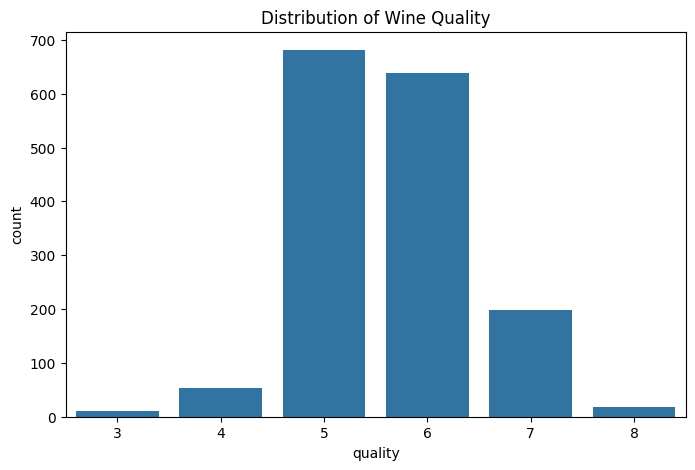

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df)
plt.title("Distribution of Wine Quality")
plt.show()


TASK 5: Convert to Binary Classification

Create New Target Column

In [17]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)


In [18]:
df[['quality', 'quality_label']].head()


,quality,quality_label
0,5,0
1,5,0
2,5,0
3,6,0
4,5,0


TASK 6: Feature and Target Separation

In [19]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']


TASK 7: Train–Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


TASK 8: Feature Scaling

In [21]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


TASK 9: Model Training

1. Logistic Regression

In [22]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)


2. KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)



3. Decision Tree

In [24]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


4. Random Forest

In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


5. SVM

In [26]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)


TASK 10: Model Evaluation

In [27]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, svm_pred)
    ]
})

results


,Model,Accuracy
0,Logistic Regression,0.865625
1,KNN,0.881250
2,Decision Tree,0.871875
3,Random Forest,0.900000
4,SVM,0.875000


TASK 11: Pipeline & Hyperparameter Tuning


Pipeline with SVM

In [28]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])


GridSearchCV

In [29]:
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__kernel': ['linear', 'rbf']})

In [30]:
grid.best_params_


{'svm__C': 10, 'svm__kernel': 'rbf'}

In [31]:
grid.best_score_


np.float64(0.8944424019607844)

Prediction

In [35]:
import numpy as np

model = rf

print("Enter wine chemical properties:")

input_data = [
    float(input("Fixed acidity: ")),
    float(input("Volatile acidity: ")),
    float(input("Citric acid: ")),
    float(input("Residual sugar: ")),
    float(input("Chlorides: ")),
    float(input("Free sulfur dioxide: ")),
    float(input("Total sulfur dioxide: ")),
    float(input("Density: ")),
    float(input("pH: ")),
    float(input("Sulphates: ")),
    float(input("Alcohol: "))
]

input_array = np.array(input_data).reshape(1, -1)

prediction = model.predict(input_array)

print("\nPrediction Result:")
print("🍷 Good Quality Wine" if prediction[0] == 1 else "❌ Bad Quality Wine")
0

Enter wine chemical properties:
Fixed acidity: 7.8
Volatile acidity: 0.35
Citric acid: 0.45
Residual sugar: 2.3
Chlorides: .065
Free sulfur dioxide: 15
Total sulfur dioxide: 40
Density: 0.9940
pH: 3.30
Sulphates: 0.75
Alcohol: 11.5

Prediction Result:
🍷 Good Quality Wine


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1.9